● Identify the TV show (English) with the most appearances in the top 10 list (you can treat
each row in the data as a separate appearance). What were the average weekly viewed
hours for that show across all appearances?

● For the "Films (Non-English)" category, identify the film with lowest IMDb rating. What
were the average weekly hours viewed for that film?

● Identify the film in the “Films (English)” category with the most cumulative weeks in the
top 10. How could you approximate how many users watched this show? What
assumptions would you make? What risks are there to your approach?

● If you plot weekly hours viewed over time (as an aggregate and for each of the four
categories), what trends do you notice?

● How many US subscribers Netflix has each quarter. How could you estimate Netflix's US subscribers?


In [2]:
import pandas as pd

In [3]:
df = pd.read_excel('Netflix.xlsx')
df.head()

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
0,Films (English),2,129110000,NaN,1,Red Notice,2022-01-04,2021-11-21
1,Films (English),1,20480000,NaN,2,There's Someone Inside Your House,2022-01-04,2021-10-10
2,TV (Non-English),1,10140000,Elite: Season 2,8,Elite,2022-01-04,2021-07-04
3,TV (English),2,58960000,Love Is Blind: Season 2,2,Love Is Blind,2022-02-22,2022-02-20
4,TV (English),5,10480000,All American: Season 3,9,All American,2022-01-04,2021-08-29


## Question 1

a). Identify the TV show (English) with the most appearances in the top 10 list (you can treat
each row in the data as a separate appearance). 

In [4]:
#Pull English TV shows onto a seperate dataframe
df_tvE = df[df['category']=='TV (English)']
df_tvE.head()

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
3,TV (English),2,58960000,Love Is Blind: Season 2,2,Love Is Blind,2022-02-22,2022-02-20
4,TV (English),5,10480000,All American: Season 3,9,All American,2022-01-04,2021-08-29
20,TV (English),4,18770000,Locke & Key: Season 2,7,Locke & Key,2022-01-04,2021-11-14
21,TV (English),1,86730000,Sex/Life: Season 1,1,Sex/Life,2022-01-04,2021-07-04
29,TV (English),2,29680000,Atypical: Season 4,4,Atypical,2022-01-04,2021-07-18


In [5]:
sorted_shows = df_tvE.sort_values('cumulative_weeks_in_top_10',ascending=False)
show_title = sorted_shows.head(1).show_title.tolist()[0]
sorted_shows

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
1351,TV (English),13,8750000,Maid: Limited Series,10,Maid,2022-01-04,2021-12-26
558,TV (English),12,10620000,Maid: Limited Series,7,Maid,2022-01-04,2021-12-19
733,TV (English),11,12540000,Maid: Limited Series,8,Maid,2022-01-04,2021-12-12
801,TV (English),10,15800000,Maid: Limited Series,8,Maid,2022-01-04,2021-12-05
1118,TV (English),9,20760000,Manifest: Season 1,8,Manifest,2022-01-25,2022-01-23
...,...,...,...,...,...,...,...,...
1001,TV (English),1,15150000,Monsters Inside: The 24 Faces of Billy Milliga...,8,Monsters Inside: The 24 Faces of Billy Milligan,2022-01-04,2021-09-26
1006,TV (English),1,15240000,Lost in Space: Season 2,5,Lost in Space,2022-01-04,2021-12-12
433,TV (English),1,16460000,Riverdale: Season 5,10,Riverdale,2022-02-01,2022-01-30
1022,TV (English),1,15760000,Another Life: Season 2,9,Another Life,2022-01-04,2021-10-24


In [6]:
print(f'The English TV show with the most appearances in the top 10 list is {show_title}.')

The English TV show with the most appearances in the top 10 list is Maid.


b). What were the average weekly viewed
hours for that show across all appearances?

In [7]:
m = sorted_shows.head(1).show_title

In [8]:
maid_df = df_tvE[df_tvE['show_title']=="Maid"]
maid_df

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
130,TV (English),1,61080000,Maid: Limited Series,2,Maid,2022-01-04,2021-10-03
157,TV (English),8,23920000,Maid: Limited Series,4,Maid,2022-01-04,2021-11-21
248,TV (English),6,41290000,Maid: Limited Series,2,Maid,2022-01-04,2021-11-07
314,TV (English),7,29480000,Maid: Limited Series,4,Maid,2022-01-04,2021-11-14
513,TV (English),5,56700000,Maid: Limited Series,2,Maid,2022-01-04,2021-10-31
558,TV (English),12,10620000,Maid: Limited Series,7,Maid,2022-01-04,2021-12-19
694,TV (English),2,166520000,Maid: Limited Series,1,Maid,2022-01-04,2021-10-10
733,TV (English),11,12540000,Maid: Limited Series,8,Maid,2022-01-04,2021-12-12
801,TV (English),10,15800000,Maid: Limited Series,8,Maid,2022-01-04,2021-12-05
987,TV (English),3,129280000,Maid: Limited Series,2,Maid,2022-01-04,2021-10-17


In [9]:
avg_viewed_hr = maid_df.weekly_hours_viewed.sum() / len(maid_df.index)
avg_viewed_hr

50423846.15384615

In [10]:
print(f'The average weekly viewed hours for Maid across all appearances is {round(avg_viewed_hr, 2)} hours.')

The average weekly viewed hours for Maid across all appearances is 50423846.15 hours.


## Question 2

a). For the "Films (Non-English)" category, identify the film with lowest IMDb rating. 

In [11]:
df_IMDb = pd.read_excel('Netflix.xlsx', 'IMDb Rating')
df_IMDb

,title,rating
0,Supergirl,4.4
1,Laws of Attraction,0.0
2,Diary of a Wimpy Kid: The Long Haul,4.2
3,Riding in Cars with Boys,6.5
4,Crisis: Special Security Squad,6.3
...,...,...
15751,Até que a sorte nos separe,5.5
15752,Gina Yashere: Skinny BAtch,6.5
15753,Stoked,6.3
15754,NaN,6.5


In [12]:
#delete later
df.head()

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
0,Films (English),2,129110000,NaN,1,Red Notice,2022-01-04,2021-11-21
1,Films (English),1,20480000,NaN,2,There's Someone Inside Your House,2022-01-04,2021-10-10
2,TV (Non-English),1,10140000,Elite: Season 2,8,Elite,2022-01-04,2021-07-04
3,TV (English),2,58960000,Love Is Blind: Season 2,2,Love Is Blind,2022-02-22,2022-02-20
4,TV (English),5,10480000,All American: Season 3,9,All American,2022-01-04,2021-08-29


In [13]:
df_film_nE = df[df['category']=='Films (Non-English)']
df_film_nE

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
11,Films (Non-English),2,6760000,NaN,5,The Privilege,2022-02-22,2022-02-20
12,Films (Non-English),3,2000000,NaN,9,Lulli,2022-01-18,2022-01-16
14,Films (Non-English),2,7420000,NaN,4,Love and Leashes,2022-02-22,2022-02-20
16,Films (Non-English),3,7190000,NaN,5,Major Grom: Plague Doctor,2022-01-04,2021-07-25
17,Films (Non-English),1,7370000,NaN,2,Haseen Dillruba,2022-01-04,2021-07-04
...,...,...,...,...,...,...,...,...
1421,Films (Non-English),1,6560000,NaN,3,Nobody Sleeps in the Woods Tonight 2,2022-01-04,2021-10-31
1424,Films (Non-English),3,2820000,NaN,8,Rurouni Kenshin: The Final,2022-01-04,2021-08-15
1427,Films (Non-English),1,9210000,NaN,4,Mimi,2022-01-04,2021-08-01
1430,Films (Non-English),1,7110000,NaN,5,Sooryavanshi,2022-01-04,2021-12-05


In [14]:
merged_df = df_film_nE.merge(df_IMDb, how='inner', left_on='show_title', right_on='title')
merged_df

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week,title,rating
0,Films (Non-English),2,6760000,NaN,5,The Privilege,2022-02-22,2022-02-20,The Privilege,4.6
1,Films (Non-English),1,18060000,NaN,2,The Privilege,2022-02-15,2022-02-13,The Privilege,4.6
2,Films (Non-English),3,2000000,NaN,9,Lulli,2022-01-18,2022-01-16,Lulli,4.7
3,Films (Non-English),1,15210000,NaN,1,Lulli,2022-01-04,2022-01-02,Lulli,4.7
4,Films (Non-English),2,4020000,NaN,6,Lulli,2022-01-11,2022-01-09,Lulli,4.7
...,...,...,...,...,...,...,...,...,...,...
372,Films (Non-English),1,1220000,NaN,8,Thimmarusu,2022-01-04,2021-09-05,Thimmarusu,7.4
373,Films (Non-English),1,2950000,NaN,6,Security,2022-01-04,2021-07-04,Security,5.8
374,Films (Non-English),1,2950000,NaN,6,Security,2022-01-04,2021-07-04,Security,4.9
375,Films (Non-English),1,2660000,NaN,8,Child of Kamiari Month,2022-02-15,2022-02-13,Child of Kamiari Month,6.0


In [15]:
sort_rat = merged_df.sort_values('rating', ascending=True)
sort_rat

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week,title,rating
376,Films (Non-English),1,2240000,NaN,6,Ilhados,2022-01-04,2021-09-19,Ilhados,0.0
237,Films (Non-English),2,6000000,NaN,3,Two,2022-01-04,2021-12-19,Two,0.0
236,Films (Non-English),1,2060000,NaN,10,Luccas Neto in: The Magical Hotel 2,2022-02-15,2022-02-13,Luccas Neto in: The Magical Hotel 2,0.0
230,Films (Non-English),1,1280000,NaN,9,O Candidato Honesto,2022-01-04,2021-07-11,O Candidato Honesto,0.0
193,Films (Non-English),4,1910000,NaN,8,Friendzone,2022-01-04,2021-10-24,Friendzone,0.0
...,...,...,...,...,...,...,...,...,...,...
73,Films (Non-English),4,2510000,NaN,7,Minnal Murali,2022-01-18,2022-01-16,Minnal Murali,8.1
72,Films (Non-English),1,5990000,NaN,4,Minnal Murali,2022-01-04,2021-12-26,Minnal Murali,8.1
218,Films (Non-English),1,1450000,NaN,10,Amores perros,2022-01-04,2021-09-19,Amores perros,8.1
75,Films (Non-English),2,11440000,NaN,3,Minnal Murali,2022-01-04,2022-01-02,Minnal Murali,8.1


In [16]:
sort_rat = sort_rat[sort_rat['rating']==0]
lowest_rat_shows = sort_rat['title'].unique()
lowest_rat_shows.tolist()

['Ilhados',
 'Two',
 'Luccas Neto in: The Magical Hotel 2',
 'O Candidato Honesto',
 'Friendzone',
 'Fierce',
 'Mimi',
 'Words Bubble Up Like Soda Pop',
 'Lassie Come Home',
 'Sinkhole',
 'Intervenção',
 'Todos queremos a alguien',
 'Luccas Neto em: O Mapa do Tesouro 2',
 'The Medium',
 'Escape From Mogadishu',
 'Sin Nombre',
 'Der Fall Collini',
 'Rogue City',
 'Flu',
 'A Classic Horror Story',
 'O Candidato Honesto 2',
 'Tudo por um Pop Star',
 "Forgotten We'll Be",
 'Sputnik']

In [17]:
print(f'The Non-English Films with the lowest IMDb rating are: {lowest_rat_shows.tolist()}.')

The Non-English Films with the lowest IMDb rating are: ['Ilhados', 'Two', 'Luccas Neto in: The Magical Hotel 2', 'O Candidato Honesto', 'Friendzone', 'Fierce', 'Mimi', 'Words Bubble Up Like Soda Pop', 'Lassie Come Home', 'Sinkhole', 'Intervenção', 'Todos queremos a alguien', 'Luccas Neto em: O Mapa do Tesouro 2', 'The Medium', 'Escape From Mogadishu', 'Sin Nombre', 'Der Fall Collini', 'Rogue City', 'Flu', 'A Classic Horror Story', 'O Candidato Honesto 2', 'Tudo por um Pop Star', "Forgotten We'll Be", 'Sputnik'].


b). What
were the average weekly hours viewed for that film?

In [209]:
avg_hour = sort_rat.groupby('title')['weekly_hours_viewed'].mean().reset_index(name='Avg_weekly_viewed_hour')
avg_hour

,title,Avg_weekly_viewed_hour
0,A Classic Horror Story,6575000
1,Der Fall Collini,2410000
2,Escape From Mogadishu,3260000
3,Fierce,1525000
4,Flu,1830000
5,Forgotten We'll Be,1580000
6,Friendzone,4522000
7,Ilhados,2240000
8,Intervenção,3650000
9,Lassie Come Home,1410000


In [19]:
print('The average weekly viewed hour for the films are: ')
for i,v in avg_hour.iterrows():
    print('{0}: {1}hrs.'.format(v['title'] ,v['Avg_weekly_viewed_hour']))

The average weekly viewed hour for the films are: 
A Classic Horror Story: 6575000hrs.
Der Fall Collini: 2410000hrs.
Escape From Mogadishu: 3260000hrs.
Fierce: 1525000hrs.
Flu: 1830000hrs.
Forgotten We'll Be: 1580000hrs.
Friendzone: 4522000hrs.
Ilhados: 2240000hrs.
Intervenção: 3650000hrs.
Lassie Come Home: 1410000hrs.
Luccas Neto em: O Mapa do Tesouro 2: 1830000hrs.
Luccas Neto in: The Magical Hotel 2: 2060000hrs.
Mimi: 4366000hrs.
O Candidato Honesto: 1280000hrs.
O Candidato Honesto 2: 2610000hrs.
Rogue City: 1925000hrs.
Sin Nombre: 2065000hrs.
Sinkhole: 2260000hrs.
Sputnik: 3290000hrs.
The Medium: 1180000hrs.
Todos queremos a alguien: 3670000hrs.
Tudo por um Pop Star: 1870000hrs.
Two: 5510000hrs.
Words Bubble Up Like Soda Pop: 2180000hrs.


## Question 3

a). Identify the film in the “Films (English)” category with the most cumulative weeks in the
top 10.  

In [20]:
df

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
0,Films (English),2,129110000,NaN,1,Red Notice,2022-01-04,2021-11-21
1,Films (English),1,20480000,NaN,2,There's Someone Inside Your House,2022-01-04,2021-10-10
2,TV (Non-English),1,10140000,Elite: Season 2,8,Elite,2022-01-04,2021-07-04
3,TV (English),2,58960000,Love Is Blind: Season 2,2,Love Is Blind,2022-02-22,2022-02-20
4,TV (English),5,10480000,All American: Season 3,9,All American,2022-01-04,2021-08-29
...,...,...,...,...,...,...,...,...
1435,Films (English),1,13690000,NaN,4,The Ice Road,2022-01-04,2021-07-04
1436,Films (English),1,8430000,NaN,10,Tomb Raider,2022-01-04,2021-08-29
1437,TV (English),1,21330000,Manifest: Season 2,5,Manifest,2022-01-04,2021-07-04
1438,TV (Non-English),7,8820000,The Cook of Castamar: Season 1,9,The Cook of Castamar,2022-01-04,2021-08-22


In [21]:
df_ef = df[df['category']=='Films (English)']
df_ef

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
0,Films (English),2,129110000,NaN,1,Red Notice,2022-01-04,2021-11-21
1,Films (English),1,20480000,NaN,2,There's Someone Inside Your House,2022-01-04,2021-10-10
7,Films (English),1,47700000,NaN,2,Bruised,2022-01-04,2021-11-28
9,Films (English),1,10110000,NaN,6,The Secret Life of Pets,2022-01-04,2021-08-22
13,Films (English),3,24750000,NaN,4,Back to the Outback,2022-01-04,2021-12-26
...,...,...,...,...,...,...,...,...
1422,Films (English),5,7240000,NaN,10,Love Hard,2022-01-04,2021-12-05
1423,Films (English),1,45800000,NaN,1,The Tinder Swindler,2022-02-08,2022-02-06
1431,Films (English),2,48140000,NaN,1,Sweet Girl,2022-01-04,2021-08-29
1435,Films (English),1,13690000,NaN,4,The Ice Road,2022-01-04,2021-07-04


In [22]:
most_t10 = df_ef.sort_values('cumulative_weeks_in_top_10', ascending=False)
most_t10


,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
449,Films (English),13,4970000,NaN,10,Red Notice,2022-03-01,2022-02-27
358,Films (English),12,6540000,NaN,6,Red Notice,2022-02-01,2022-01-30
374,Films (English),11,7310000,NaN,8,Red Notice,2022-01-25,2022-01-23
41,Films (English),10,8710000,NaN,6,Red Notice,2022-01-18,2022-01-16
716,Films (English),9,11090000,NaN,6,Red Notice,2022-01-11,2022-01-09
...,...,...,...,...,...,...,...,...
620,Films (English),1,7770000,NaN,7,Noah,2022-01-04,2021-09-12
631,Films (English),1,9840000,NaN,4,Final Score,2022-01-04,2021-10-31
646,Films (English),1,7650000,NaN,7,Warcraft,2022-01-04,2021-07-04
647,Films (English),1,6560000,NaN,10,Rust Creek,2022-01-04,2021-07-18


In [23]:
t1_show = most_t10.head(1).show_title.tolist()[0]
t1_show

'Red Notice'

In [24]:
print(f'The film in the “Films (English)” category with the most cumulative weeks in the top 10 is {t1_show}.')

The film in the “Films (English)” category with the most cumulative weeks in the top 10 is Red Notice.


b). How could you approximate how many users watched this show? What
assumptions would you make? What risks are there to your approach?

Using only the data given to investigate the question how many watch 'Red notice', I would like to make a few assumptions. The assumption is that each user watches the film only once, there is no sharing accounts among users, each user watches the film individually, the runtime given in the dataset is measured in minutes.

With these assumptions, I would generate a dataframe with only 'Red Notice' and join the 'runtime' dataset onto the data frame. Having these data, I would convert 'weekly_hours_viewed' to minutes and divide it by 'runtime' to find out how many times the content has been played, and I'll name the new data 'Number of times played'. Under my assumptions, the resulting number would be the number of users that have watched 'Red Notice'.

The risk of this is based on the assupmtions that I generated, it is impossible that no user shares account and that all users watch the film individually. There might even be the possibility that the users watch the film multiple times. While users watching the film multiple times is relatively a lot uncommon than users sharing accounts and watching with others, it means that the number of users that I calculated using my assumptions is most likely an underestimate.

## Question 4

a). If you plot weekly hours viewed over time (as an aggregate and for each of the four
categories), what trends do you notice?

In [25]:
import matplotlib.pyplot as plt

In [26]:
df.head()

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
0,Films (English),2,129110000,NaN,1,Red Notice,2022-01-04,2021-11-21
1,Films (English),1,20480000,NaN,2,There's Someone Inside Your House,2022-01-04,2021-10-10
2,TV (Non-English),1,10140000,Elite: Season 2,8,Elite,2022-01-04,2021-07-04
3,TV (English),2,58960000,Love Is Blind: Season 2,2,Love Is Blind,2022-02-22,2022-02-20
4,TV (English),5,10480000,All American: Season 3,9,All American,2022-01-04,2021-08-29


/Users/percy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/percy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/percy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'Weekly hours viewed')

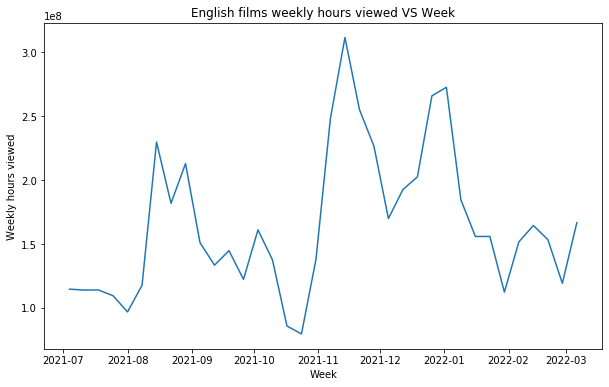

In [27]:
sum_feng = df_ef.groupby('week')['weekly_hours_viewed'].sum().reset_index(name='total_weekly_hours_viewed')
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

plt.plot(sum_feng['week'], sum_feng['total_weekly_hours_viewed'], label = "English films")
plt.title('English films weekly hours viewed VS Week')
plt.xlabel('Week')
plt.ylabel('Weekly hours viewed')


English Films weekly viewing hours trend:
The trend shows that the viewing hours of English films oscillates quite a bit between July 2021 to March 2022. Apart from the first major spike happened and peaked in August at around 230,000,000 viewing hours, and the trend starts trailing down before hitting the biggest spike starting from the end of Oct and peaking in mid-November in 2021. Before the biggest peak was the lowest point of the viewing hours for English films at around 30,000,000 weekly viewing hours, and it increased rapidly to around 320,000,000 weekly viewing hours in mid-November resulting in an approximately 10 fold increase in viewing hours. From mid-November 2021 to the end of our recorded data, March 2022, the viewing hours for English films start heading in an overall downward/negative direction.

In [185]:
#investigating the highest peak
print(sum_feng['total_weekly_hours_viewed'].argmax())
print(sum_feng.iloc[19])
d = df_ef[df_ef['week']=='2021-11-14'].sort_values('weekly_rank')
d

19
week                         2021-11-14 00:00:00
total_weekly_hours_viewed              311370000
Name: 19, dtype: object


,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
289,Films (English),1,148720000,NaN,1,Red Notice,2022-01-04,2021-11-14
1292,Films (English),2,58560000,NaN,2,Love Hard,2022-01-04,2021-11-14
368,Films (English),2,33060000,NaN,3,The Harder They Fall,2022-01-04,2021-11-14
1164,Films (English),3,20560000,NaN,4,Army of Thieves,2022-01-04,2021-11-14
1334,Films (English),1,13780000,NaN,5,Father Christmas Is Back,2022-01-04,2021-11-14
1228,Films (English),1,7900000,NaN,6,211,2022-01-04,2021-11-14
133,Films (English),3,7620000,NaN,7,Army of the Dead,2022-01-04,2021-11-14
503,Films (English),1,7490000,NaN,8,Passing,2022-01-04,2021-11-14
1107,Films (English),2,6920000,NaN,9,Transformers: The Last Knight,2022-01-04,2021-11-14
1125,Films (English),1,6760000,NaN,10,Jumanji: The Next Level,2022-01-04,2021-11-14


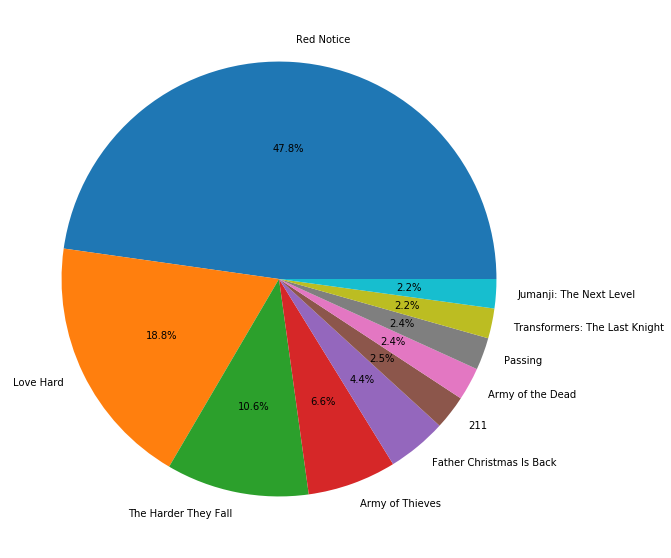

In [186]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.pie(d['weekly_hours_viewed'], labels = d['show_title'], autopct='%1.1f%%')
plt.show()

In [187]:
#investigating the film with the most hours viewed
dfFE = df_ef.sort_values('weekly_hours_viewed', ascending=False)
dfFE

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
1391,Films (English),2,152290000,NaN,1,Don't Look Up,2022-01-04,2022-01-02
289,Films (English),1,148720000,NaN,1,Red Notice,2022-01-04,2021-11-14
0,Films (English),2,129110000,NaN,1,Red Notice,2022-01-04,2021-11-21
744,Films (English),1,111030000,NaN,1,Don't Look Up,2022-01-04,2021-12-26
1058,Films (English),1,90860000,NaN,1,The Kissing Booth 3,2022-01-04,2021-08-15
...,...,...,...,...,...,...,...,...
596,Films (English),4,4400000,NaN,8,The Guilty,2022-01-04,2021-10-24
735,Films (English),4,4190000,NaN,10,Venom,2022-01-04,2021-10-31
1345,Films (English),7,4160000,NaN,10,Vivo,2022-01-04,2021-10-03
991,Films (English),1,3440000,NaN,9,Street Kings,2022-01-04,2021-10-24


In [188]:
#investigating the film with the most hours viewed
d2 = df_ef[df_ef['week']=='2022-01-02'].sort_values('weekly_rank')
print(sum_feng[sum_feng['week']=='2022-01-02'])
d2

         week  total_weekly_hours_viewed
26 2022-01-02                  272420000


,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
1391,Films (English),2,152290000,NaN,1,Don't Look Up,2022-01-04,2022-01-02
1315,Films (English),4,21310000,NaN,2,The Unforgivable,2022-01-04,2022-01-02
490,Films (English),1,18260000,NaN,3,The Lost Daughter,2022-01-04,2022-01-02
851,Films (English),4,17720000,NaN,4,Back to the Outback,2022-01-04,2022-01-02
720,Films (English),8,14540000,NaN,5,Red Notice,2022-01-04,2022-01-02
940,Films (English),3,14180000,NaN,6,Spider-Man: Homecoming,2022-01-04,2022-01-02
874,Films (English),2,12870000,NaN,7,Fast & Furious Presents: Hobbs & Shaw,2022-01-04,2022-01-02
749,Films (English),1,10380000,NaN,8,Death to 2021,2022-01-04,2022-01-02
1023,Films (English),1,5440000,NaN,9,Journey 2: The Mysterious Island,2022-01-04,2022-01-02
842,Films (English),1,5430000,NaN,10,Spider-Man,2022-01-04,2022-01-02


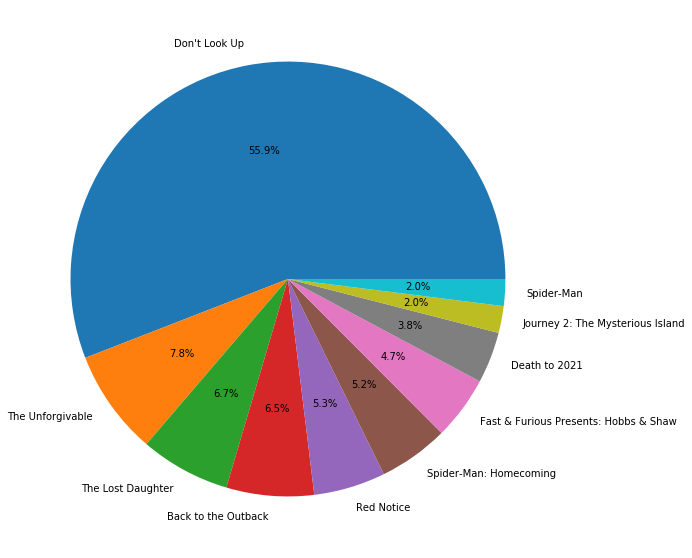

In [189]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.pie(d2['weekly_hours_viewed'], labels = d2['show_title'], autopct='%1.1f%%')
plt.show()

In [183]:
#investigating the trough
print(sum_feng['total_weekly_hours_viewed'].argmin())
print(sum_feng.iloc[16])
df2 = df_ef[df_ef['week']=='2021-10-24'].sort_values('weekly_rank', ascending=False)
df2

16
week                         2021-10-24 00:00:00
total_weekly_hours_viewed               79640000
Name: 16, dtype: object


,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
1348,Films (English),4,3430000,NaN,10,Hotel Transylvania 3: Summer Vacation,2022-01-04,2021-10-24
991,Films (English),1,3440000,NaN,9,Street Kings,2022-01-04,2021-10-24
596,Films (English),4,4400000,NaN,8,The Guilty,2022-01-04,2021-10-24
690,Films (English),2,4520000,NaN,7,Going in Style,2022-01-04,2021-10-24
517,Films (English),1,5350000,NaN,6,Unfaithful,2022-01-04,2021-10-24
62,Films (English),5,5570000,NaN,5,My Little Pony: A New Generation,2022-01-04,2021-10-24
1151,Films (English),1,5780000,NaN,4,A Dog's Journey,2022-01-04,2021-10-24
1265,Films (English),1,7380000,NaN,3,What Happens in Vegas,2022-01-04,2021-10-24
132,Films (English),3,7900000,NaN,2,Venom,2022-01-04,2021-10-24
73,Films (English),1,31870000,NaN,1,Night Teeth,2022-01-04,2021-10-24


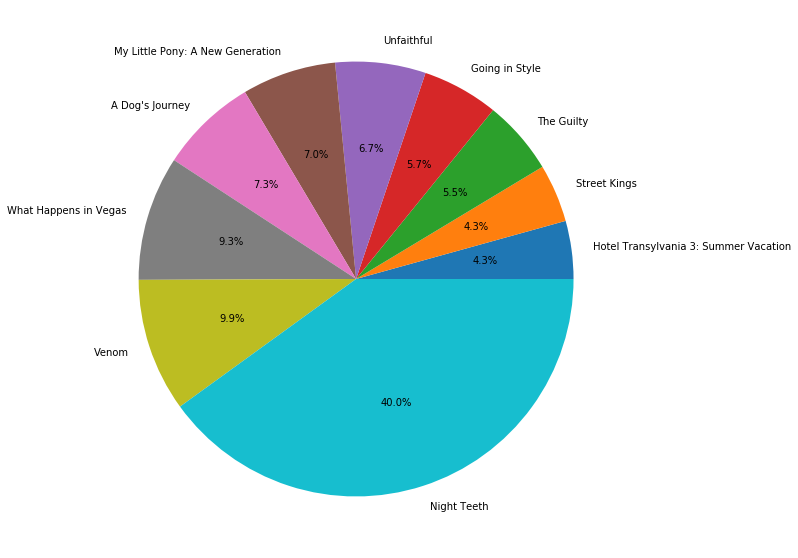

In [184]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.pie(df2['weekly_hours_viewed'], labels = df2['show_title'], autopct='%1.1f%%')
plt.show()

English films weekly viewing hours trend:

Overall, there seems to be a high volatility to the weekly viewing hours of English films judging from the constant oscillation of the graph. To being my investigation, I would try to investigate them to gain more insights on the trend.

The most weekly viewing hours for the English films happened in the week of 2021-11-14 and the film that attracted the most hours viewed was 'Red Notice'. It took up around 48% of the total viewing hours of the week across all films and the next most weekly hours viewed show had only 19% of the total viewing hours of the week.

Aside from the data of the films from each week, I also wanted to find out the show with the highest weekly_hours_viewed in general. The show happened to be 'Don't Look Up' also which has total viwed hours of around 150,000,000 in the week with the highest peak, 2022-01-02. Exploring the popularity of 'Don't Look Up' would yield great insights to generate higher weekly viewing hours in the future.

The week with the least viewing hours is 2021-10-24. The show with the least hours viewed is 'Hotel Transylvania 3: Summer Vacation' with around 4% of the total viewing hours across all content that week. However, 'Hotel Transylvania 3: Summer Vacation' has been in the 'cumulative_weeks_in_top10' for 4 times and since the show was released in 2018 more investigation is needed on the reason why it is not so popular during this week.

/Users/percy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/percy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/percy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'Weekly hours viewed')

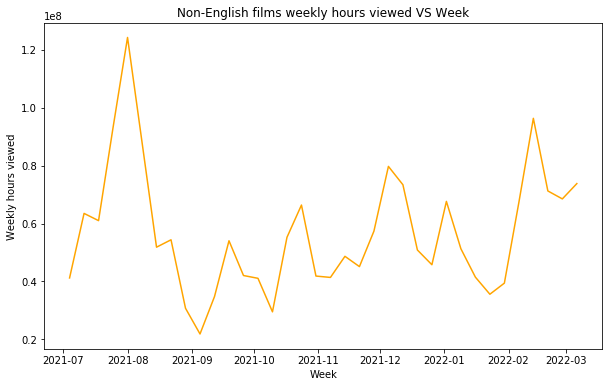

In [29]:
sum_fNeng = df_film_nE.groupby('week')['weekly_hours_viewed'].sum().reset_index(name='total_weekly_hours_viewed')
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

plt.plot(sum_fNeng['week'], sum_fNeng['total_weekly_hours_viewed'],'orange', label = "Non-English films")
plt.title('Non-English films weekly hours viewed VS Week')
plt.xlabel('Week')
plt.ylabel('Weekly hours viewed')


In [190]:
#investigating the highest peak
print(sum_fNeng['total_weekly_hours_viewed'].argmax())
print(sum_fNeng.iloc[4])
d = df_film_nE[df_film_nE['week']=='2021-08-01'].sort_values('weekly_rank')
d

4
week                         2021-08-01 00:00:00
total_weekly_hours_viewed              124290000
Name: 4, dtype: object


,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
572,Films (Non-English),2,52370000,NaN,1,Blood Red Sky,2022-01-04,2021-08-01
502,Films (Non-English),1,16120000,NaN,2,The Last Mercenary,2022-01-04,2021-08-01
337,Films (Non-English),2,15120000,NaN,3,Kingdom: Ashin of the North,2022-01-04,2021-08-01
1427,Films (Non-English),1,9210000,NaN,4,Mimi,2022-01-04,2021-08-01
894,Films (Non-English),1,9210000,NaN,5,Bartkowiak,2022-01-04,2021-08-01
313,Films (Non-English),1,8610000,NaN,6,Rurouni Kenshin: The Beginning,2022-01-04,2021-08-01
1106,Films (Non-English),2,5570000,NaN,7,Chernobyl 1986,2022-01-04,2021-08-01
786,Films (Non-English),3,3130000,NaN,8,A Perfect Fit,2022-01-04,2021-08-01
1238,Films (Non-English),4,2770000,NaN,9,Major Grom: Plague Doctor,2022-01-04,2021-08-01
312,Films (Non-English),1,2180000,NaN,10,Words Bubble Up Like Soda Pop,2022-01-04,2021-08-01


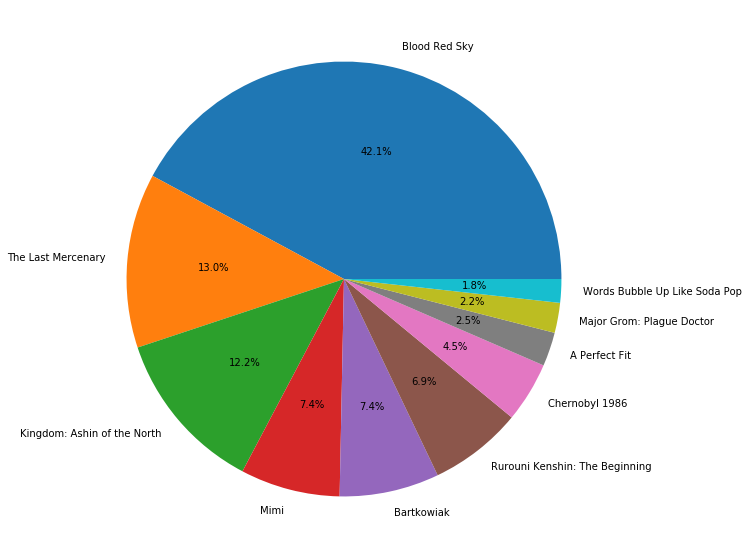

In [192]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.pie(d['weekly_hours_viewed'], labels = d['show_title'], autopct='%1.1f%%')
plt.show()

In [193]:
#investigating the show with the most hours viewed
dfFNE = df_film_nE.sort_values('weekly_hours_viewed', ascending=False)
dfFNE

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
572,Films (Non-English),2,52370000,NaN,1,Blood Red Sky,2022-01-04,2021-08-01
488,Films (Non-English),1,35930000,NaN,1,Blood Red Sky,2022-01-04,2021-07-25
357,Films (Non-English),2,34700000,NaN,1,Through My Window,2022-02-15,2022-02-13
1359,Films (Non-English),1,33250000,NaN,1,Through My Window,2022-02-08,2022-02-06
871,Films (Non-English),2,26730000,NaN,1,Spoiled Brats,2022-01-04,2021-12-05
...,...,...,...,...,...,...,...,...
1282,Films (Non-English),1,1120000,NaN,10,Pinkfong & Baby Shark's Space Adventure,2022-01-04,2021-09-05
1229,Films (Non-English),4,1110000,NaN,10,Grudge,2022-01-04,2021-10-31
846,Films (Non-English),2,1050000,NaN,8,Pinkfong & Baby Shark's Space Adventure,2022-01-04,2021-09-26
86,Films (Non-English),3,1030000,NaN,9,Xtreme,2022-01-04,2021-09-26


In [194]:
#investigating the trough
print(sum_fNeng['total_weekly_hours_viewed'].argmin())
print(sum_fNeng.iloc[9])
df2 = df_film_nE[df_film_nE['week']=='2021-09-05'].sort_values('weekly_rank', ascending=False)
df2

9
week                         2021-09-05 00:00:00
total_weekly_hours_viewed               21840000
Name: 9, dtype: object


,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
1282,Films (Non-English),1,1120000,NaN,10,Pinkfong & Baby Shark's Space Adventure,2022-01-04,2021-09-05
751,Films (Non-English),1,1130000,NaN,9,I Don't Know Whether to Slit My Wrists or Leav...,2022-01-04,2021-09-05
1264,Films (Non-English),1,1220000,NaN,8,Thimmarusu,2022-01-04,2021-09-05
839,Films (Non-English),6,1330000,NaN,7,Rurouni Kenshin: The Beginning,2022-01-04,2021-09-05
44,Films (Non-English),3,1420000,NaN,6,Black Island,2022-01-04,2021-09-05
785,Films (Non-English),1,1830000,NaN,5,Flu,2022-01-04,2021-09-05
1155,Films (Non-English),7,2080000,NaN,4,Blood Red Sky,2022-01-04,2021-09-05
114,Films (Non-English),3,2100000,NaN,3,The Secret Diary of an Exchange Student,2022-01-04,2021-09-05
54,Films (Non-English),3,2270000,NaN,2,Out of my league,2022-01-04,2021-09-05
1307,Films (Non-English),1,7340000,NaN,1,Invasion,2022-01-04,2021-09-05


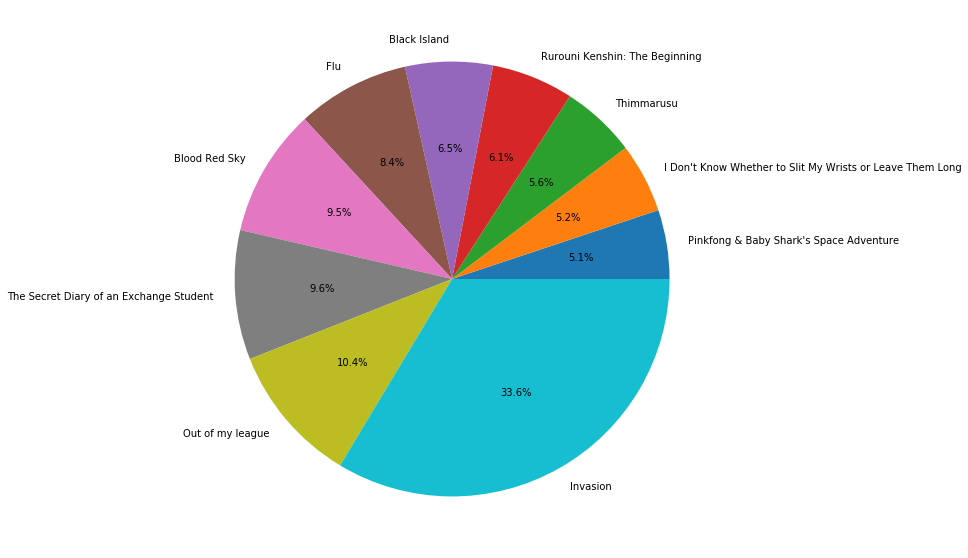

In [195]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.pie(df2['weekly_hours_viewed'], labels = df2['show_title'], autopct='%1.1f%%')
plt.show()

Non-English films weekly viewing hours trend:

The Non-English films' weekly viewing hours trend has one major peak and a major trough. Overall, the trend seems to be heading in a positive direction after the drop from the first and biggest peak. Seeing the pattern of a huge spike at the beginning of the graph and a gradual increase after the biggest drop, I'd like to investigate further on the weekly data to gain more insights on the phenomenon.

The most weekly viewing hours for the Non-English films happened in the week of 2021-08-01 and the film that attracted the most hours viewed was 'Blood Red Sky'. It took up around 42% of the total viewing hours of the week across all films and the next most weekly hours viewed show had only 19% of the total viewing hours of the week.

Aside from the data of the films from each week, I also wanted to find out the show with the highest weekly_hours_viewed in general. The show happened to be 'Blood Red Sky' also which has total viwed hours of around 52,000,000 in the week with the highest peak, 2021-08-01. 

The week with the least viewing hours is 2021-09-05. The film with the least hours viewed is 'Pinkfong & Baby Shark's Space Adventure' with around 5% of the total viewing hours across all content that week. 

Exploring the popularity of 'Blood Red Sky' and the reason for dislike for 'Pinkfong & Baby Shark's Space Adventure' would yield great insights to generate higher weekly viewing hours in the future.

Text(0, 0.5, 'Weekly hours viewed')

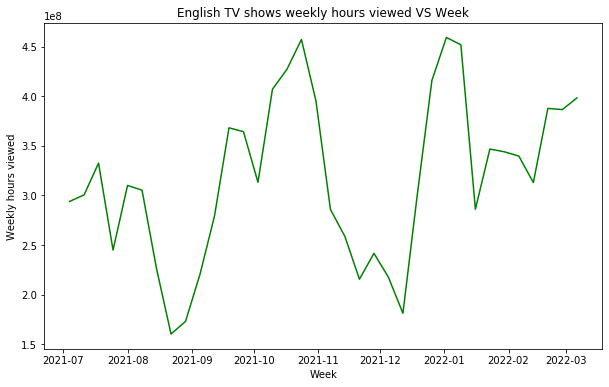

In [30]:
sum_tveng = df_tvE.groupby('week')['weekly_hours_viewed'].sum().reset_index(name='total_weekly_hours_viewed')
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

plt.plot(sum_tveng['week'], sum_tveng['total_weekly_hours_viewed'],'g', label = "English TV shows")
plt.title('English TV shows weekly hours viewed VS Week')
plt.xlabel('Week')
plt.ylabel('Weekly hours viewed')


Get information on the trend:

In [196]:
#investigating the highest peak
print(sum_tveng['total_weekly_hours_viewed'].argmax())
print(sum_tveng.loc[26])
d = df_tvE[df_tvE['week']=='2022-01-02'].sort_values('weekly_rank')
d

26
week                         2022-01-02 00:00:00
total_weekly_hours_viewed              459280000
Name: 26, dtype: object


,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
460,TV (English),1,120060000,Cobra Kai: Season 4,1,Cobra Kai,2022-01-04,2022-01-02
1284,TV (English),3,94270000,The Witcher: Season 2,2,The Witcher,2022-01-04,2022-01-02
1129,TV (English),2,91980000,Emily in Paris: Season 2,3,Emily in Paris,2022-01-04,2022-01-02
174,TV (English),4,42890000,The Witcher: Season 1,4,The Witcher,2022-01-04,2022-01-02
1248,TV (English),1,31290000,Stay Close: Season 1,5,Stay Close,2022-01-04,2022-01-02
942,TV (English),2,25170000,Emily in Paris: Season 1,6,Emily in Paris,2022-01-04,2022-01-02
890,TV (English),1,14420000,Queer Eye: Season 6,7,Queer Eye,2022-01-04,2022-01-02
538,TV (English),1,13450000,Cobra Kai: Season 1,8,Cobra Kai,2022-01-04,2022-01-02
184,TV (English),1,13070000,Crime Scene: The Times Square Killer: Limited ...,9,Crime Scene: The Times Square Killer,2022-01-04,2022-01-02
611,TV (English),2,12680000,WWII in Color: Road to Victory: Season 1,10,WWII in Color: Road to Victory,2022-01-04,2022-01-02


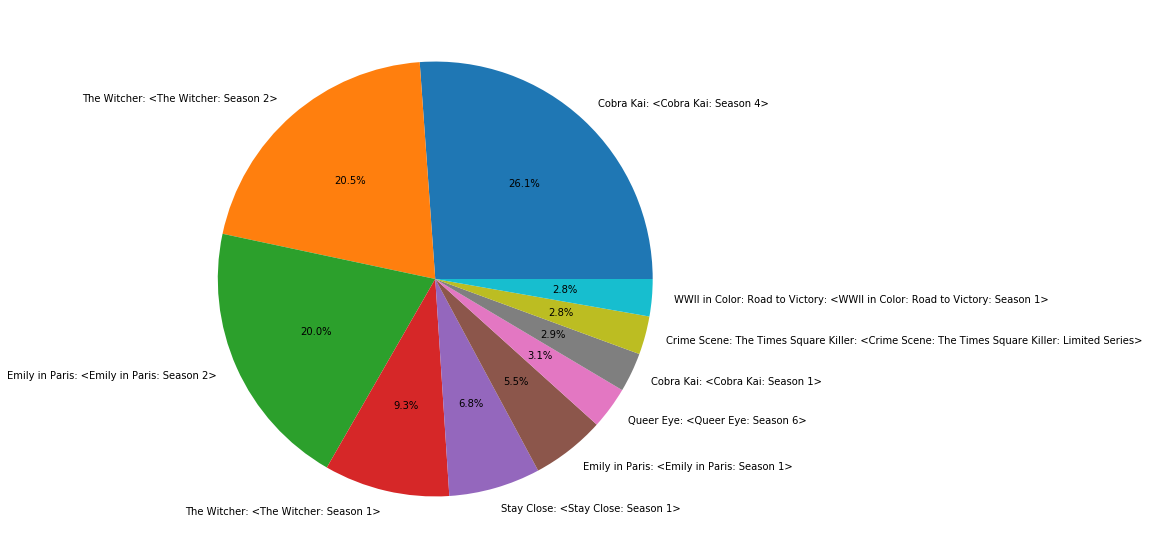

In [197]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.pie(d['weekly_hours_viewed'], labels = d['show_title']+': <'+d['season_title'] +'>', autopct='%1.1f%%')
plt.show()

In [198]:
#investigating the trough
print(sum_tveng['total_weekly_hours_viewed'].argmin())
print(sum_tveng.loc[7])
d2 = df_tvE[df_tvE['week']=='2021-08-22'].sort_values('weekly_rank', ascending=False)
d2

7
week                         2021-08-22 00:00:00
total_weekly_hours_viewed              160250000
Name: 7, dtype: object


,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
1101,TV (English),6,10430000,The Good Doctor: Season 1,10,The Good Doctor,2022-01-04,2021-08-22
1082,TV (English),2,10990000,CoComelon: Season 3,9,CoComelon,2022-01-04,2021-08-22
1428,TV (English),1,11140000,Brand New Cherry Flavor: Limited Series,8,Brand New Cherry Flavor,2022-01-04,2021-08-22
710,TV (English),2,12180000,Gabby's Dollhouse: Season 2,7,Gabby's Dollhouse,2022-01-04,2021-08-22
1406,TV (English),1,13220000,Bake Squad: Season 1,6,Bake Squad,2022-01-04,2021-08-22
74,TV (English),2,14540000,For Life: Season 1,5,For Life,2022-01-04,2021-08-22
255,TV (English),4,14990000,All American: Season 3,4,All American,2022-01-04,2021-08-22
588,TV (English),4,20300000,Outer Banks: Season 1,3,Outer Banks,2022-01-04,2021-08-22
330,TV (English),3,20660000,Hit & Run: Season 1,2,Hit & Run,2022-01-04,2021-08-22
179,TV (English),4,31800000,Outer Banks: Season 2,1,Outer Banks,2022-01-04,2021-08-22


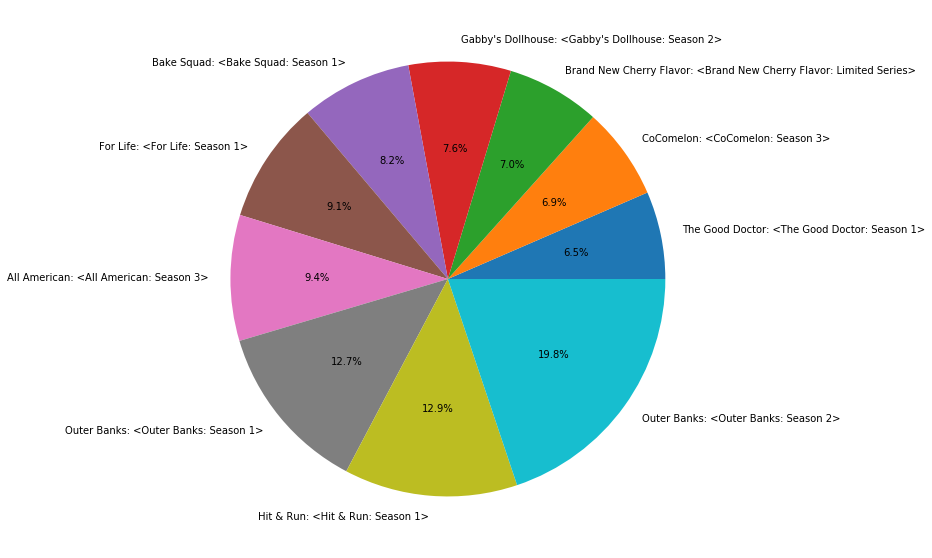

In [199]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.pie(d2['weekly_hours_viewed'], labels = d2['show_title']+': <'+d2['season_title'] +'>', autopct='%1.1f%%')
plt.show()

In [200]:
#investigating the show with the most hours viewed
dfshowE = df_tvE.sort_values('weekly_hours_viewed', ascending=False)
dfshowE
d2 = df_tvE[df_tvE['week']=='2022-02-20'].sort_values('weekly_rank')
print(sum_tveng[sum_tveng['week']=='2022-02-20'])
d2

         week  total_weekly_hours_viewed
33 2022-02-20                  387730000


,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
639,TV (English),2,195970000,Inventing Anna: Limited Series,1,Inventing Anna,2022-02-22,2022-02-20
3,TV (English),2,58960000,Love Is Blind: Season 2,2,Love Is Blind,2022-02-22,2022-02-20
877,TV (English),3,29760000,Sweet Magnolias: Season 2,3,Sweet Magnolias,2022-02-22,2022-02-20
1074,TV (English),5,17990000,Ozark: Season 4 Part 1,4,Ozark,2022-02-22,2022-02-20
648,TV (English),3,17550000,Raising Dion: Season 2,5,Raising Dion,2022-02-22,2022-02-20
408,TV (English),1,15390000,One of Us Is Lying: Season 1,6,One of Us Is Lying,2022-02-22,2022-02-20
378,TV (English),1,14630000,The Cuphead Show!: Season 1,7,The Cuphead Show!,2022-02-22,2022-02-20
97,TV (English),3,14140000,Raising Dion: Season 1,8,Raising Dion,2022-02-22,2022-02-20
1397,TV (English),2,12300000,Disenchantment: Part 4,9,Disenchantment,2022-02-22,2022-02-20
1184,TV (English),4,11040000,The Woman in the House Across the Street from ...,10,The Woman in the House Across the Street from ...,2022-02-22,2022-02-20


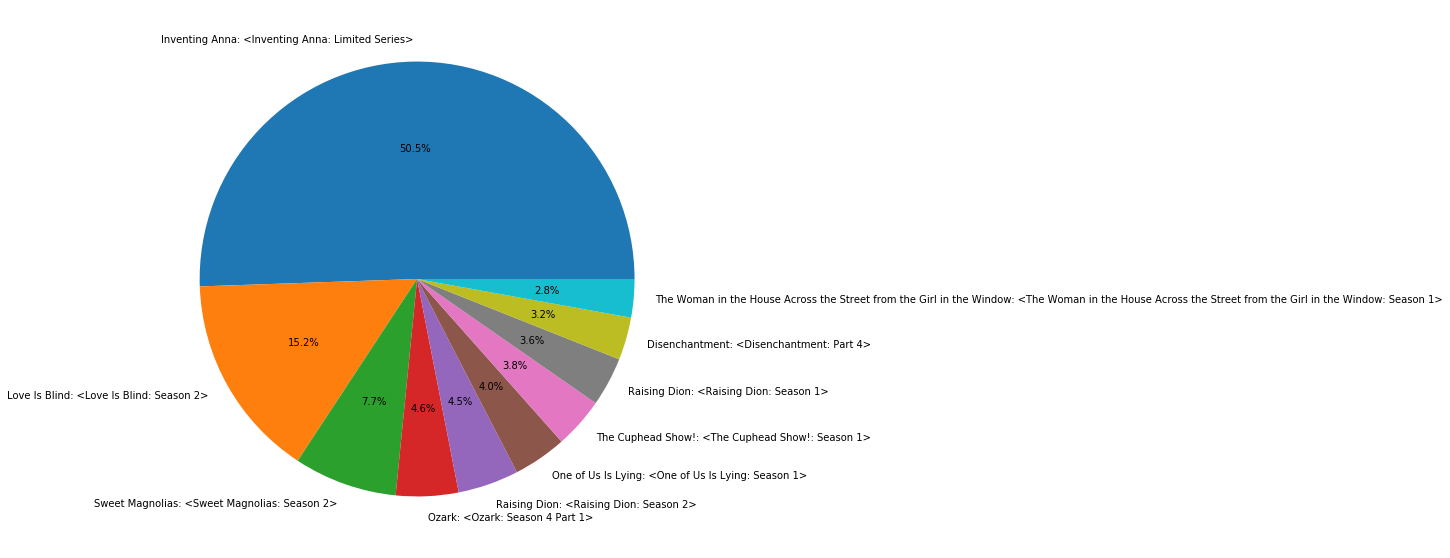

In [201]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.pie(d2['weekly_hours_viewed'], labels = d2['show_title']+': <'+d2['season_title'] +'>', autopct='%1.1f%%')
plt.show()

English TV shows weekly viewing hours trend:
The English TV shows' weekly viewing hours trend had two major peaks and a major trough which are very apparent at the first glance of the graph. The oscillation of the viewing hours trend is quite intense meaning that the English TV shows' viewing hours are quite volatile and easy to influence. By the end of our recorded data, the viewing hour trend ends with a positive climbing direction. Since the two major peaks and the trough are so intense, I believe by investigating them in detail would generate great insights. 

The most viewing hours for the English TV shows happened in the week of 2022-01-02 and the show that attracted the most hours viewed was 'Cobra Kai: Season 4'. It took up around 26% of the total viewing hours of the week across all shows and the next most weekly hours viewed show had only 20% of the total viewing hours of the week. Within the week with highest viewing hour count, there are two 'Cobra Kai', two 'The Witcher', and two 'Emily in Paris' titles that all attracted a lot of viewing hours. There might be common elements within these shows that are worth investigating to draw insights on the shows that audience prefer.

Aside from the data of the shows from each week, I also wanted to find out the show with the highest weekly_hours_viewed in general. The show happened to be 'Inventing Anna: Limited Series' which has total viwed hours of around 200,000,000 in the week of 2022-02-20. t took up around 51% of the total viewing hours of the week across all shows and the next most weekly hours viewed show had only 15% of the total viewing hours of the week. Exploring the popularity of 'Inventing Anna: Limited Series' would yield great insights to generate higher weekly viewing hours in the future.

The week with the least viewing hours is 2021-08-22. The show with the least hours viewed is 'The Good Doctor' with around 6% of the total viewing hours across all content that week. However, 'The Good Doctor: season 1' has been in the 'cumulative_weeks_in_top10' for 6 times and since the show was released in 2017 more investigation is needed on the reason why it is not so popular during this week.

Text(0, 0.5, 'Weekly hours viewed')

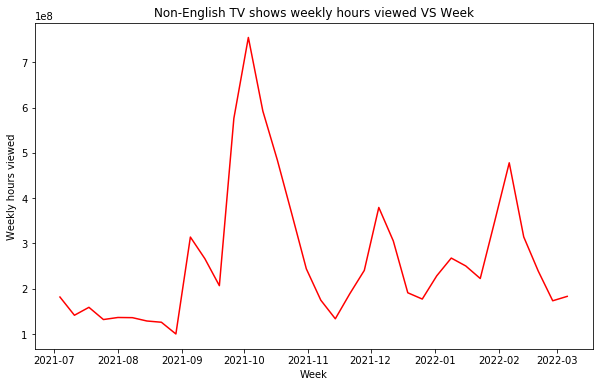

In [31]:
df_tv_NE = df[df['category']=='TV (Non-English)']
sum_tvNeng = df_tv_NE.groupby('week')['weekly_hours_viewed'].sum().reset_index(name='total_weekly_hours_viewed')
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

plt.plot(sum_tvNeng['week'], sum_tvNeng['total_weekly_hours_viewed'],'r', label = "Non-English TV shows")
plt.title('Non-English TV shows weekly hours viewed VS Week')
plt.xlabel('Week')
plt.ylabel('Weekly hours viewed')


In [43]:
df_tv_NE

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
2,TV (Non-English),1,10140000,Elite: Season 2,8,Elite,2022-01-04,2021-07-04
5,TV (Non-English),1,28270000,"Newly Rich, Newly Poor: Season 1",3,"Newly Rich, Newly Poor",2022-01-04,2021-07-04
6,TV (Non-English),4,12150000,Money Heist: Part 1,6,Money Heist,2022-01-04,2021-09-26
8,TV (Non-English),13,13000000,Money Heist: Part 5,7,Money Heist,2022-01-18,2022-01-16
10,TV (Non-English),1,11850000,Twenty Five Twenty One: Season 1,7,Twenty Five Twenty One,2022-03-01,2022-02-27
...,...,...,...,...,...,...,...,...
1425,TV (Non-English),2,6060000,Demon Slayer: Kimetsu no Yaiba: Tanjiro Kamado...,10,Demon Slayer: Kimetsu no Yaiba,2022-01-04,2021-11-14
1426,TV (Non-English),1,9790000,NaN,9,Carrossel,2022-01-04,2021-07-11
1434,TV (Non-English),1,63190000,Squid Game: Season 1,1,Squid Game,2022-01-04,2021-09-19
1438,TV (Non-English),7,8820000,The Cook of Castamar: Season 1,9,The Cook of Castamar,2022-01-04,2021-08-22


In [145]:
#investigating the highest peak
print(sum_tvNeng['total_weekly_hours_viewed'].argmax())
print(sum_tvNeng.iloc[13])
d = df_tv_NE[df_tv_NE['week']=='2021-10-03'].sort_values('weekly_rank')
d

13
week                         2021-10-03 00:00:00
total_weekly_hours_viewed              754510000
Name: 13, dtype: object


,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
936,TV (Non-English),3,571760000,Squid Game: Season 1,1,Squid Game,2022-01-04,2021-10-03
1226,TV (Non-English),1,31380000,The Chestnut Man: Season 1,2,The Chestnut Man,2022-01-04,2021-10-03
1173,TV (Non-English),5,28330000,Hometown Cha-Cha-Cha: Season 1,3,Hometown Cha-Cha-Cha,2022-01-04,2021-10-03
71,TV (Non-English),2,27030000,Ganglands: Season 1,4,Ganglands,2022-01-04,2021-10-03
833,TV (Non-English),2,26280000,Alice in Borderland: Season 1,5,Alice in Borderland,2022-01-04,2021-10-03
1304,TV (Non-English),1,20090000,Baki Hanma: Season 1,6,Baki Hanma,2022-01-04,2021-10-03
1152,TV (Non-English),5,14250000,Money Heist: Part 5,7,Money Heist,2022-01-04,2021-10-03
1172,TV (Non-English),4,13420000,The Seven Deadly Sins: Dragon's Judgement,8,The Seven Deadly Sins,2022-01-04,2021-10-03
571,TV (Non-English),1,12600000,Love 101: Season 2,9,Love 101,2022-01-04,2021-10-03
319,TV (Non-English),5,9370000,Money Heist: Part 1,10,Money Heist,2022-01-04,2021-10-03


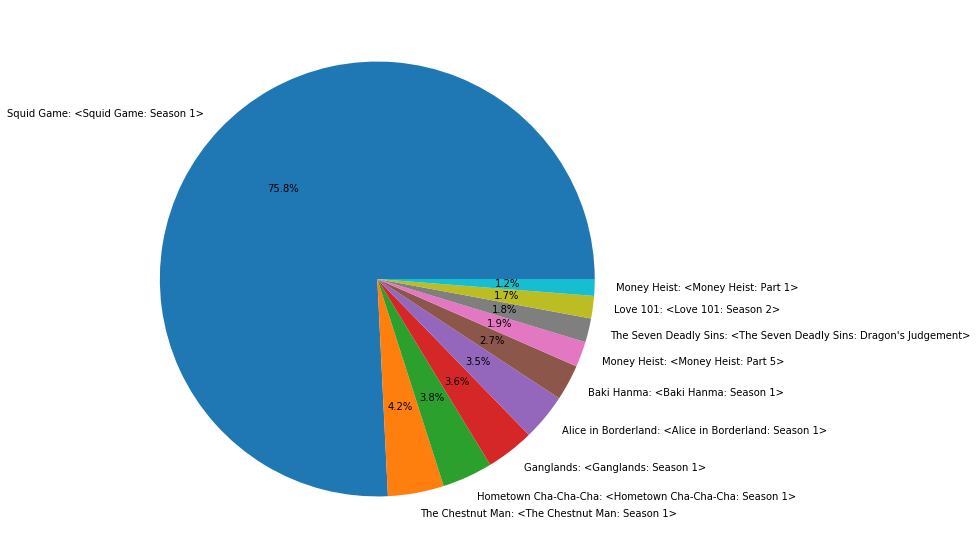

In [176]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.pie(d['weekly_hours_viewed'], labels = d['show_title']+': <'+d['season_title'] +'>', autopct='%1.1f%%')
plt.show()

In [163]:
#investigating the show with the most hours viewed
dfshowNE = df_tv_NE.sort_values('weekly_hours_viewed', ascending=False)
dfshowNE

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
936,TV (Non-English),3,571760000,Squid Game: Season 1,1,Squid Game,2022-01-04,2021-10-03
655,TV (Non-English),2,448730000,Squid Game: Season 1,1,Squid Game,2022-01-04,2021-09-26
1299,TV (Non-English),4,412940000,Squid Game: Season 1,1,Squid Game,2022-01-04,2021-10-10
739,TV (Non-English),5,258840000,Squid Game: Season 1,1,Squid Game,2022-01-04,2021-10-17
424,TV (Non-English),2,236230000,All of Us Are Dead: Season 1,1,All of Us Are Dead,2022-02-08,2022-02-06
...,...,...,...,...,...,...,...,...
973,TV (Non-English),1,6950000,The King's Affection: Season 1,10,The King's Affection,2022-01-04,2021-10-24
251,TV (Non-English),5,6920000,Elite: Season 4,10,Elite,2022-01-04,2021-08-01
1266,TV (Non-English),4,6840000,Lupin: Part 2,10,Lupin,2022-01-04,2021-07-25
285,TV (Non-English),1,6660000,Elves: Season 1,10,Elves,2022-01-04,2021-11-28


In [164]:
d2 = df_tv_NE[df_tv_NE['week']=='2021-10-03'].sort_values('weekly_rank')
print(sum_tvNeng[sum_tvNeng['week']=='2021-10-03'])
d2

         week  total_weekly_hours_viewed
13 2021-10-03                  754510000


,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
936,TV (Non-English),3,571760000,Squid Game: Season 1,1,Squid Game,2022-01-04,2021-10-03
1226,TV (Non-English),1,31380000,The Chestnut Man: Season 1,2,The Chestnut Man,2022-01-04,2021-10-03
1173,TV (Non-English),5,28330000,Hometown Cha-Cha-Cha: Season 1,3,Hometown Cha-Cha-Cha,2022-01-04,2021-10-03
71,TV (Non-English),2,27030000,Ganglands: Season 1,4,Ganglands,2022-01-04,2021-10-03
833,TV (Non-English),2,26280000,Alice in Borderland: Season 1,5,Alice in Borderland,2022-01-04,2021-10-03
1304,TV (Non-English),1,20090000,Baki Hanma: Season 1,6,Baki Hanma,2022-01-04,2021-10-03
1152,TV (Non-English),5,14250000,Money Heist: Part 5,7,Money Heist,2022-01-04,2021-10-03
1172,TV (Non-English),4,13420000,The Seven Deadly Sins: Dragon's Judgement,8,The Seven Deadly Sins,2022-01-04,2021-10-03
571,TV (Non-English),1,12600000,Love 101: Season 2,9,Love 101,2022-01-04,2021-10-03
319,TV (Non-English),5,9370000,Money Heist: Part 1,10,Money Heist,2022-01-04,2021-10-03


In [168]:
#investigating the trough
print(sum_tvNeng['total_weekly_hours_viewed'].argmin())
print(sum_tvNeng.iloc[8])
d2 = df_tv_NE[df_tv_NE['week']=='2021-08-29'].sort_values('weekly_rank', ascending=False)
d2

8
week                         2021-08-29 00:00:00
total_weekly_hours_viewed              100390000
Name: 8, dtype: object


,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
618,TV (Non-English),1,7340000,"Yo soy Betty, la fea: Season 1",10,"Yo soy Betty, la fea",2022-01-04,2021-08-29
674,TV (Non-English),8,7550000,The Cook of Castamar: Season 1,9,The Cook of Castamar,2022-01-04,2021-08-29
757,TV (Non-English),1,8220000,Open Your Eyes: Season 1,8,Open Your Eyes,2022-01-04,2021-08-29
1213,TV (Non-English),1,8430000,D.P.: Season 1,7,D.P.,2022-01-04,2021-08-29
397,TV (Non-English),3,9020000,Valeria: Season 2,6,Valeria,2022-01-04,2021-08-29
1403,TV (Non-English),8,9750000,NaN,5,Carrossel,2022-01-04,2021-08-29
922,TV (Non-English),5,10980000,Hospital Playlist: Season 2,4,Hospital Playlist,2022-01-04,2021-08-29
1056,TV (Non-English),3,11500000,AlRawabi School for Girls: Limited Series,3,AlRawabi School for Girls,2022-01-04,2021-08-29
37,TV (Non-English),9,12120000,"Newly Rich, Newly Poor: Season 1",2,"Newly Rich, Newly Poor",2022-01-04,2021-08-29
510,TV (Non-English),5,15480000,The Snitch Cartel: Origins: Season 1,1,The Snitch Cartel: Origins,2022-01-04,2021-08-29


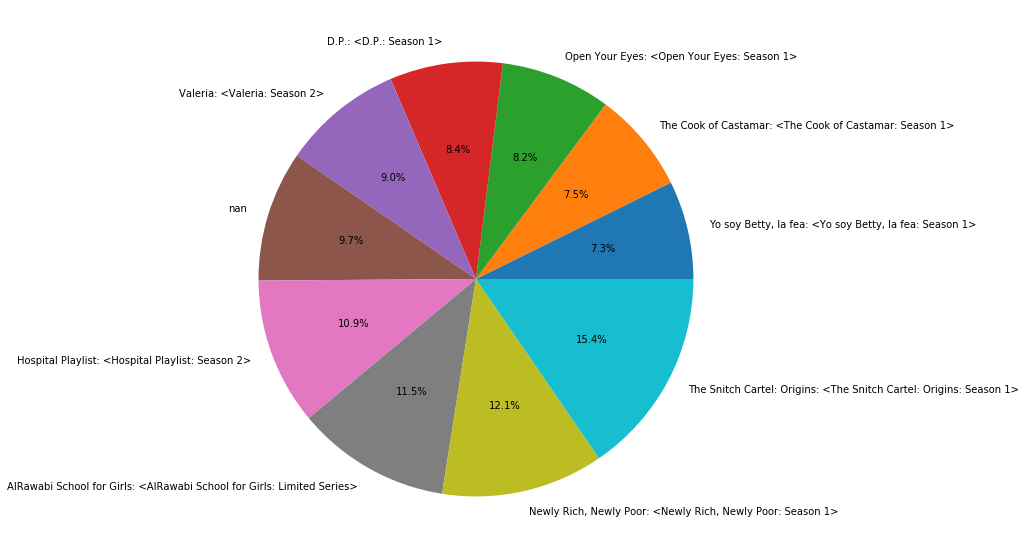

In [177]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.pie(d2['weekly_hours_viewed'], labels = d2['show_title']+': <'+d2['season_title'] +'>', autopct='%1.1f%%')
plt.show()

Non-English TV shows weekly viewing hours trend:

The Non-English TV shows' weekly viewing hours trend had two major peaks and a major trough which are very apparent at the first glance of the graph. Apart from the biggest spikes around October, and a smaller one towards the end of the graph, the overall direction of the trend is positive. The abnormally high peak calls for further investigation on its cause.

The most viewing hours for the Non-English TV shows happened in the week of 2021-10-03 and the show that attracted the most hours viewed was 'Squid Game: 1'. It took up around 76% of the total viewing hours of the week across all shows and the next most weekly hours viewed show had only 4.2% of the total viewing hours of the week. 'Squid Game' also happens to be the most hour viewed Non-English TV show. 

The week with the least viewing hours is 2021-08-29. The show with the least hours viewed is 'Yo soy Betty, la fea: Season 1' with around 7.3% of the total viewing hours across all content that week. 

Further investigation on 'Squid Game' would heavily benefit Netflix as it did a phonomenal job in aquiring viewing hours for Netflix.

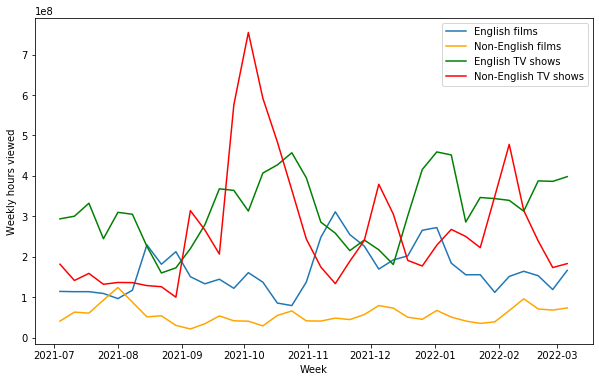

In [32]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)
plt.plot(sum_feng['week'], sum_feng['total_weekly_hours_viewed'], label = "English films")
plt.plot(sum_fNeng['week'], sum_fNeng['total_weekly_hours_viewed'],'orange', label = "Non-English films")
plt.plot(sum_tveng['week'], sum_tveng['total_weekly_hours_viewed'],'g', label = "English TV shows")
plt.plot(sum_tvNeng['week'], sum_tvNeng['total_weekly_hours_viewed'],'r', label = "Non-English TV shows")
plt.legend()
plt.xlabel('Week')
plt.ylabel('Weekly hours viewed')
plt.show()

Trends comparison across different categories:

English TV shows seem to be consistently obtaining the most weekly viewing hours among the other categories, and it would seem like Non-English TV shows are rising in popularity gradually. English films oscillate quite a bit, meaning that there is high volatility in that category and marketing could be applied to influence the trend of the English films weekly viewing hours. Non-English films trend remains quite stable over the course of the recorded time interval, meaning that while it is the least popular genre, it is also harder to influence the trend.

# Question 5

a). Another key investor question is how many US subscribers Netflix has each quarter.
Name one type of dataset you could use to answer this question. How would this data
source help you estimate Netflix's US subscribers?


In [33]:
df_ef.head()
df_ef1 = df_ef[df_ef['week']== '2021-11-21']
df_ef1 = df_ef1.sort_values('weekly_rank', ascending=False)
df_ef1

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
989,Films (English),1,7680000,NaN,10,Goosebumps 2: Haunted Halloween,2022-01-04,2021-11-21
1309,Films (English),1,7770000,NaN,9,6 Underground,2022-01-04,2021-11-21
1366,Films (English),1,10120000,NaN,8,Trolls,2022-01-04,2021-11-21
1168,Films (English),4,12260000,NaN,7,Army of Thieves,2022-01-04,2021-11-21
1027,Films (English),1,13440000,NaN,6,The Croods,2022-01-04,2021-11-21
622,Films (English),3,13770000,NaN,5,The Harder They Fall,2022-01-04,2021-11-21
1246,Films (English),1,14910000,NaN,4,Central Intelligence,2022-01-04,2021-11-21
997,Films (English),3,21240000,NaN,3,Love Hard,2022-01-04,2021-11-21
176,Films (English),1,24770000,NaN,2,The Princess Switch 3: Romancing the Star,2022-01-04,2021-11-21
0,Films (English),2,129110000,NaN,1,Red Notice,2022-01-04,2021-11-21


Using only the data given to investigate the question how many US subscirbers Netflix has each quarter, I would like to make a few assumptions. The assumption is that the US subscribers watch only contents in English, and the second assumption is that each subscriber watches the contents only once, and third assumption is that the runtime given in the dataset is measured in minutes, and each subscriber watches Netflix every quarter.

With these assumptions, I would generate a dataframe with contents in English(category), along with their 'title', 'weekly_hours_viewed', 'week', 'weekly_rank' and respective 'runtime' which is data from the Runtime sheet. I am not familiar of the time length of a quarter defined by Netflix, so I will assume a quarter to be a season, which is three months. I will investigate the winter quarter, which includes all of the contents watched in weeks between December to Feburary 2021, by extracting those contents onto a separate dataframe. Having those data, I would convert 'weekly_hours_viewed' to minutes and divide it by 'runtime' to find out how many times the content has been played, and I'll name the new data 'played number'. For each of the week, I would convert the 'weekly_rank' to be a percentage coefficient with rank 10 being 100% and each rank higher decreases by 10% respectively.(e.g. rank 8 is 80%, and rank 2 is 20%) I multiply 'played number' by their respective weekly rank percentage to estimate the amount of subscribers that has only watched the specific content. For example, if the content has weekly rank of 2, then the 'played number' of the content would be multiplied by 20%, meaning that only 20% of the subscribers only watched this content. So the equation would be similar to a linear regression equation (US Subscriber # = x1 * y1 + x2 * y2 + ... + xn+yn) with x being the 'played number' and y being the weekly_rank of the content. The intuition behind this is that for lowly ranked shows, it is very niche and usually focused on serving a specific type of audience, but the popular shows could be watched by many different group types, resulting in overlapping of audience.